# Distribution Shift

## 📊 1. Kolmogorov–Smirnov Test (Continuous Feature Shift)
Scenario: Compare distribution of age in training vs production

K–S Statistic: 0.371
P-value: 1.269310553972161e-61
⚠️ Distribution shift detected in 'age'


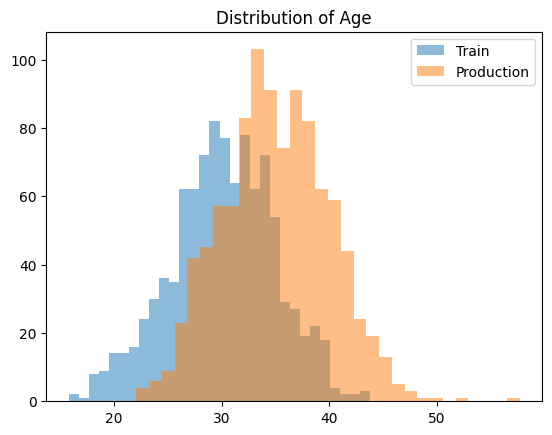

In [1]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Simulate training data (normal distribution)
train_ages = np.random.normal(loc=30, scale=5, size=1000)

# Simulate production data (shifted distribution)
prod_ages = np.random.normal(loc=35, scale=5, size=1000)

# Run K–S test
ks_stat, p_value = ks_2samp(train_ages, prod_ages)

# Print result
print("K–S Statistic:", ks_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("⚠️ Distribution shift detected in 'age'")
else:
    print("✅ No significant shift detected")

# Plot for visualization
plt.hist(train_ages, bins=30, alpha=0.5, label='Train')
plt.hist(prod_ages, bins=30, alpha=0.5, label='Production')
plt.title("Distribution of Age")
plt.legend()
plt.show()

## 🟦 2. Chi-Square Test (Categorical Feature Shift)
Scenario: Compare distribution of device_type in training vs production

Chi-square Statistic: 87.61904761904762
P-value: 9.413812732720572e-20
⚠️ Categorical distribution shift detected in 'device_type'


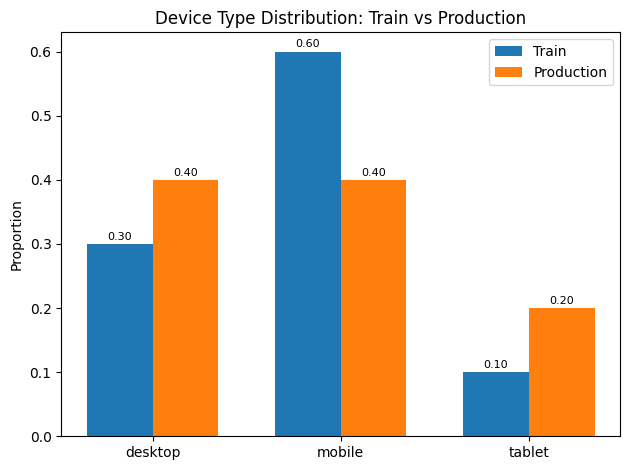

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Simulate category counts for 'device_type'
train_counts = pd.Series(['mobile'] * 600 + ['desktop'] * 300 + ['tablet'] * 100).value_counts()
prod_counts = pd.Series(['mobile'] * 400 + ['desktop'] * 400 + ['tablet'] * 200).value_counts()

# Combine into a contingency table
observed = pd.DataFrame({'Train': train_counts, 'Production': prod_counts}).sort_index()

# Run Chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

# Print result
print("Chi-square Statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("⚠️ Categorical distribution shift detected in 'device_type'")
else:
    print("✅ No significant shift detected")

# ---- Visualization ----
# Normalize counts to proportions
proportions = observed.div(observed.sum(axis=0), axis=1)

# Bar chart
x = np.arange(len(proportions.index))  # device types
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, proportions['Train'], width, label='Train')
bar2 = ax.bar(x + width/2, proportions['Production'], width, label='Production')

# Labels and formatting
ax.set_ylabel('Proportion')
ax.set_title("Device Type Distribution: Train vs Production")
ax.set_xticks(x)
ax.set_xticklabels(proportions.index)
ax.legend()

# Show values on bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

plt.tight_layout()
plt.show()
